# Class 4 - Tree-based models

**Packages import**

In [1]:
# %%capture
# !pip install scipy numpy pandas scikit-learn matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.tree import plot_tree, DecisionTreeClassifier as CART
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Dataset preprocessing

We'll use IMDB 5000 Movies dataset in the analysis

In [5]:
dataset = pd.read_csv("IMDB.csv")
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Initial EDA (Exploratory Data Analysis)**

In [6]:
#Checking numeric columns
dataset.describe(include=[np.number])

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
#Checking categorical columns
dataset.describe(include=['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5029,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,46,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [8]:
#Dropping columns with high cardinality and imbalanced classes
dataset.drop(['color', 'director_name', 'actor_2_name', 'actor_1_name',
             'movie_title', 'actor_3_name', 'plot_keywords',
             'movie_imdb_link', 'language', 'country', 'content_rating'],
             axis = 1, inplace = True)

In [9]:
#Drop duplicates
print(dataset.shape)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(5043, 17)
(4998, 17)


In [10]:
#Check null values
dataset.isnull().sum()

num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        874
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [11]:
#Dropping missing values
dataset.dropna(inplace=True)
dataset.shape

(3768, 17)

In [12]:
numeric_dataset = dataset.select_dtypes(np.number)

**Detecting outliers**

A raw score x is converted into a standard score by

$$ z= \frac{x-\mu}{\sigma}  $$

where:

* μ is the mean of the population,
* σ is the standard deviation of the population.

In [13]:
stats.zscore(numeric_dataset)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.516365,2.983953,-0.261867,0.052422,-0.430413,10.181748,5.177046,-0.344030,-0.67011,6.640315,0.847268,0.603860,-0.234013,1.358907,-0.934081,1.115987
1,1.105791,2.587778,-0.077813,0.130430,2.088356,3.700280,2.429061,1.942246,-0.67011,2.209195,1.126507,0.402991,0.667095,0.600574,0.680176,-0.431892
2,3.536129,1.663370,-0.261867,-0.320942,0.215425,2.129417,1.135459,0.016701,-0.18379,1.613824,0.882727,1.206467,-0.354412,0.316199,0.680176,3.555069
3,5.245466,2.367681,6.930308,11.966172,1.248766,5.693514,6.886378,5.010981,-0.67011,5.778979,0.904888,0.905164,4.658227,1.927657,0.680176,7.260597
5,2.401971,0.959059,-0.106582,-0.122424,-0.453664,0.304447,0.713882,-0.499597,-0.18379,0.989172,0.965612,0.905164,-0.301419,0.126615,0.680176,0.693838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,-0.822277,-0.889758,-0.132081,-0.407558,-0.494674,-0.735585,-0.661151,-0.597739,-0.67011,-0.748139,-0.203158,-0.300051,-0.441552,0.979740,-0.735839,-0.399199
5029,-0.708861,0.034650,-0.241598,-0.404330,-0.489249,-0.743907,-0.649476,-0.591960,-0.67011,-0.689578,-0.198770,-0.601355,-0.438670,0.884948,-0.735839,-0.393570
5033,-0.182288,-1.462011,-0.166734,-0.403254,-0.476203,-0.739163,-0.210305,-0.578668,-0.67011,0.093676,-0.203171,0.101687,-0.431574,0.505782,-0.735839,0.459311
5035,-0.887086,-1.285933,-0.261867,-0.404330,-0.487183,-0.715942,-0.346610,-0.590279,-0.67011,-0.494374,-0.203171,-1.103527,-0.437117,0.410990,-2.095214,-0.431892


In [14]:
#Removing outliers
dataset = dataset[(np.abs(stats.zscore(numeric_dataset)) < 9).all(axis=1)]
dataset.shape

(3743, 17)

**Feature engineering**

In [15]:
# Splitting genres column values
dataset['genres'] = dataset.genres.str.split("|")
dataset['genres']

1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
                              ...                        
5027                                              [Drama]
5029                   [Crime, Horror, Mystery, Thriller]
5033                            [Drama, Sci-Fi, Thriller]
5035            [Action, Crime, Drama, Romance, Thriller]
5042                                        [Documentary]
Name: genres, Length: 3743, dtype: object

In [16]:
# Getting distinct categories
categories = set(dataset.genres.explode())
categories

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [17]:
for cat in categories:
    dataset[cat] = dataset.genres.apply(lambda s: int(cat in s))
dataset.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,Sport,Music,Mystery,Comedy,Western,Adventure,Drama,Sci-Fi,Action,Crime
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,"[Action, Adventure, Fantasy]",471220,48350,0.0,...,0,0,0,0,0,1,0,0,1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,"[Action, Adventure, Thriller]",275868,11700,1.0,...,0,0,0,0,0,1,0,0,1,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",212204,1873,1.0,...,0,0,0,0,0,1,0,1,1,0
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,"[Action, Adventure, Romance]",383056,46055,0.0,...,0,0,0,0,0,1,0,0,1,0
7,324.0,100.0,15.0,284.0,799.0,200807262.0,"[Adventure, Animation, Comedy, Family, Fantasy...",294810,2036,1.0,...,0,0,0,1,0,1,0,0,0,0


In [18]:
#Drop genres column
dataset.drop('genres', axis = 1, inplace = True)

**EDA on cleaned data**

In [19]:
dataset.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Horror', 'Film-Noir', 'Family', 'Fantasy',
       'Animation', 'Biography', 'Romance', 'History', 'Documentary',
       'Musical', 'War', 'Thriller', 'Sport', 'Music', 'Mystery', 'Comedy',
       'Western', 'Adventure', 'Drama', 'Sci-Fi', 'Action', 'Crime'],
      dtype='object')

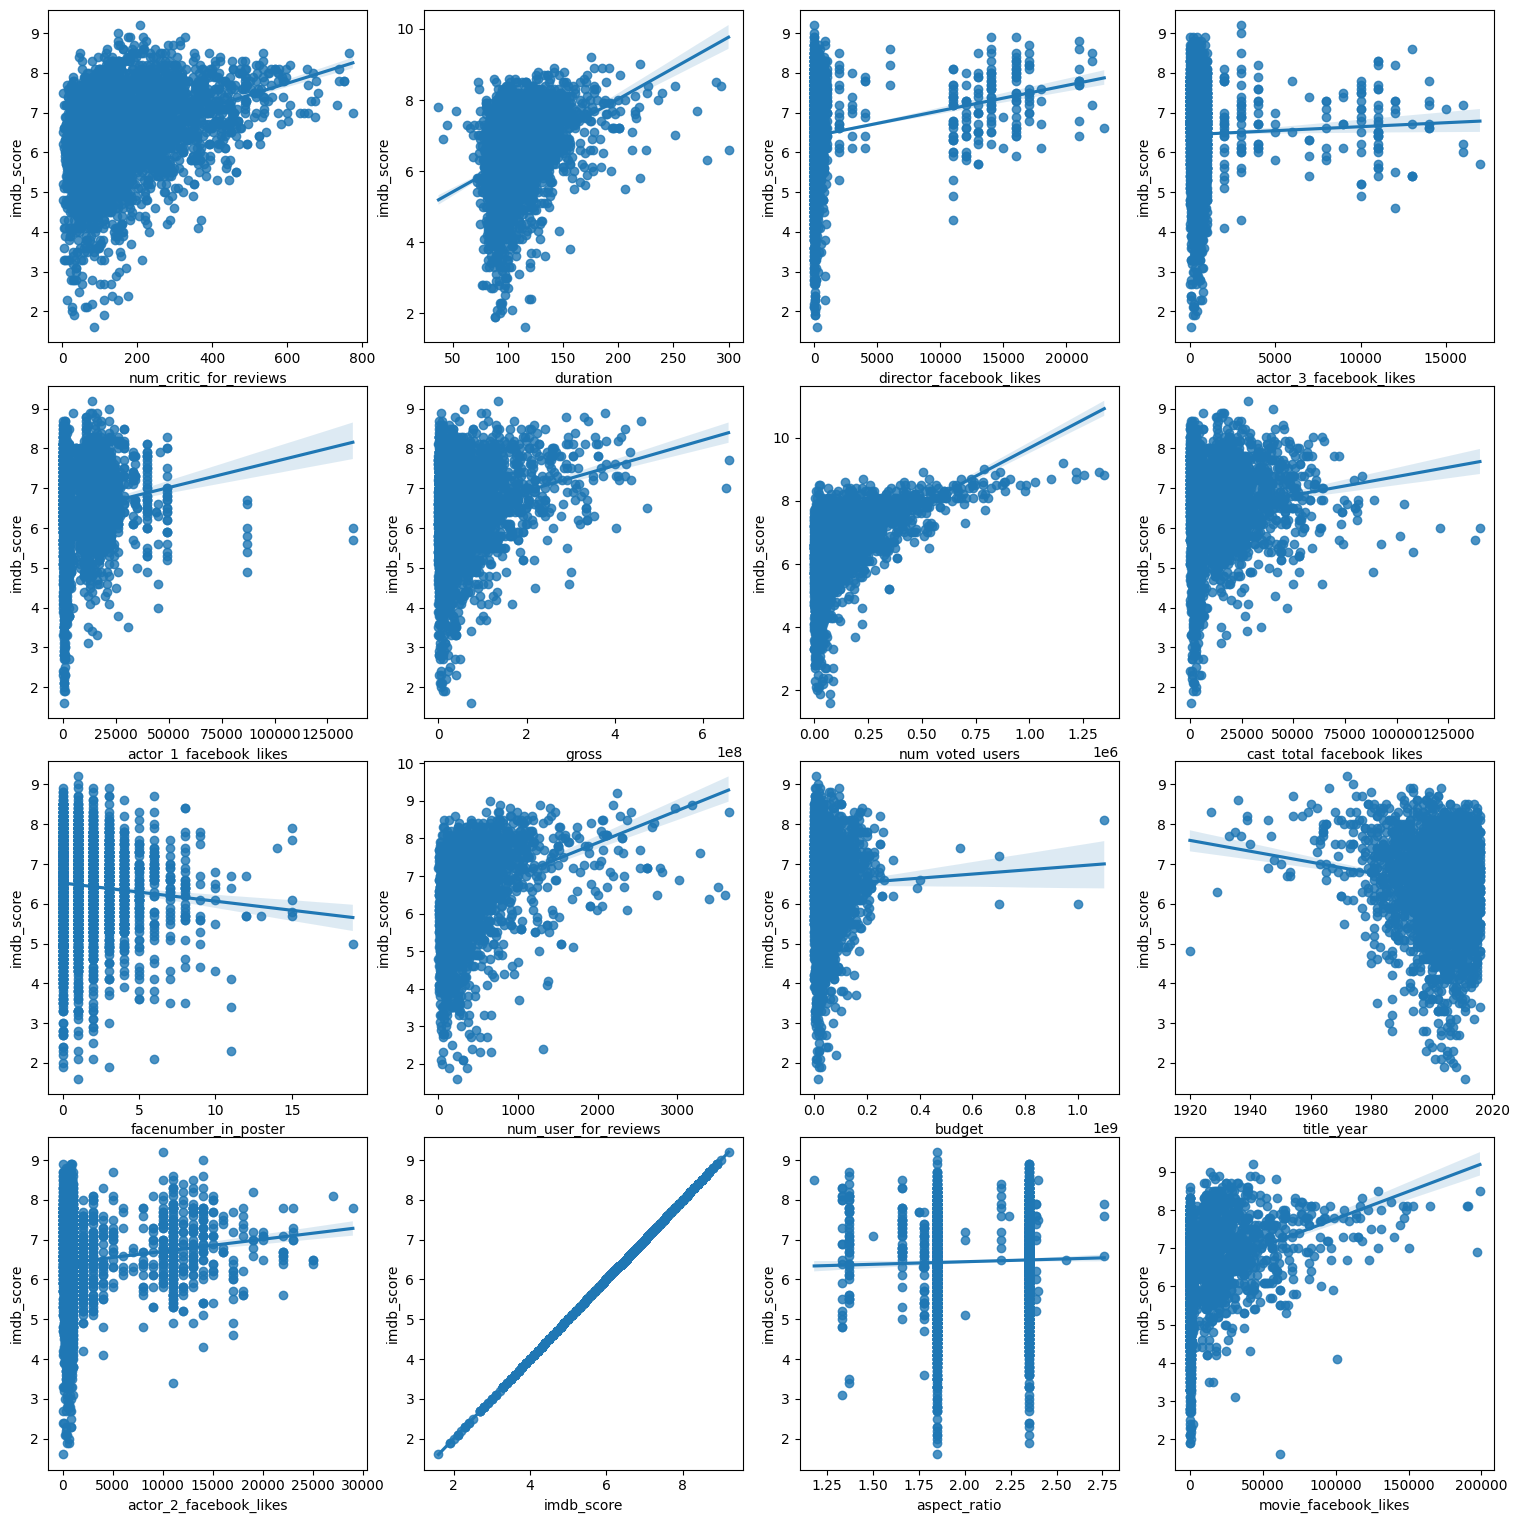

In [20]:
f, axes = plt.subplots(4, 4, figsize=[15, 15])
plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
for n, col in enumerate(dataset.columns[0:16]):
    sns.regplot(x=col, y="imdb_score", data=dataset, ax=axes[n // 4, n % 4])

**Switching from regression to binary classification task**

In [21]:
print(np.median(dataset.imdb_score))
dataset['imdb_score'] = np.where(dataset['imdb_score'] >= 6.0, 1, 0)
dataset['imdb_score'].value_counts()

6.6


imdb_score
1    2699
0    1044
Name: count, dtype: int64

**Splitting data into train and test subsets**

In [22]:
X = dataset.drop('imdb_score', axis=1)
y = dataset['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

**Decision Trees**

From: [sklearn docs](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)

_What are all the various decision tree algorithms and how do they differ from each other? Which one is implemented in scikit-learn?_

**ID3** (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

**C4.5** is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

**C5.0** is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

**CART** (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

**scikit-learn uses an optimised version of the CART algorithm**

CART algorithm pick variables and cutoff threshold using:
 1. __for classification__: minimization of node's heterogeneity (Gini index or entropy) 
 2. __for regression__: minimizing error of prediction (e.g. sum of squares of residuals)

In [23]:
X_train_CART, X_val_CART, y_train_CART, y_val_CART = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [24]:
imdb_tree = CART(random_state=42, ccp_alpha=0.0).fit(X_train_CART, y_train_CART)

In [25]:
imdb_tree.get_depth()

16

In [26]:
imdb_tree.get_n_leaves()

313

[**Pruning CART tree (cost based)**](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)


In [27]:
path = imdb_tree.cost_complexity_pruning_path(X_train_CART, y_train_CART)
ccp_alphas, impurities = path.ccp_alphas[::4], path.impurities[::4]

In [28]:
imdb_trees = []
for cp in ccp_alphas:
    imdb_trees.append(CART(random_state=42, ccp_alpha=cp).fit(X_train_CART, y_train_CART))

In [29]:
for order, ind in [('First', 0), ('Last', -1)]:
    print(f"{order} tree with ccp_alpha: {ccp_alphas[ind]:.5f}, " +
          f"nodes: {imdb_trees[ind].tree_.node_count}, leaves: {imdb_trees[ind].get_n_leaves()}")

First tree with ccp_alpha: 0.00000, nodes: 625, leaves: 313
Last tree with ccp_alpha: 0.02473, nodes: 3, leaves: 2


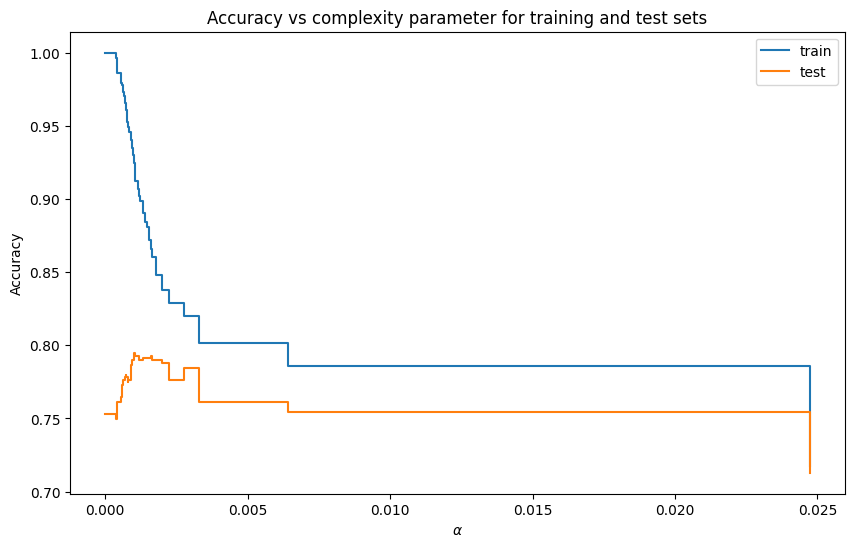

In [30]:
val_scores = [accuracy_score(tree.predict(X_val_CART), y_val_CART) for tree in imdb_trees]
train_scores = [accuracy_score(tree.predict(X_train_CART), y_train_CART) for tree in imdb_trees]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, label = "train", drawstyle = "steps-post")
plt.plot(ccp_alphas, val_scores, label = "test", drawstyle = "steps-post")
plt.xlabel(r"$\alpha$")
plt.ylabel("Accuracy")
plt.title("Accuracy vs complexity parameter for training and test sets")
plt.legend()
plt.show()

In [31]:
#Complexity (cost) that produce the best tree
Best_CART = imdb_trees[np.argmax(val_scores)]
Best_CART.ccp_alpha

0.0010025927671897098

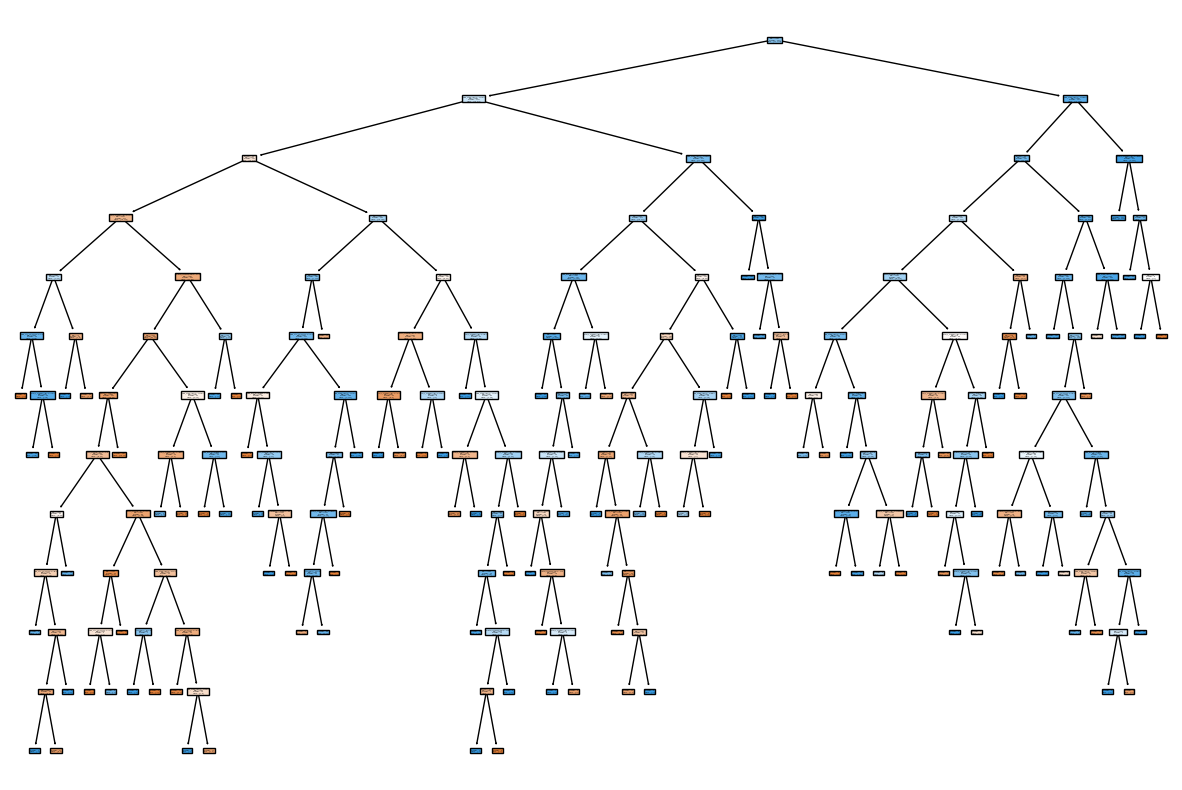

In [32]:
#Visualize the tree
plt.figure(figsize = (15, 10))
_ = plot_tree(Best_CART, #imdb_trees[-1],
                   feature_names = X_train.columns,  
                   filled = True)

In [33]:
#Accuracy of the best tree
round(max(val_scores)*100,3)

79.466

### Ensemble tree-based methods

[Ensemble learning](https://scikit-learn.org/stable/modules/ensemble.html) helps improve final model performance by combining results of underlying models (e.g. random forest is combination of decision trees).

Two families of ensemble methods are usually distinguished:

- In **averaging methods**, the main principle is to build several estimators **independently** and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator.

> Example: Random forests

- By contrast, in **boosting methods**, base estimators are built **sequentially** and the following models tries to reduce the error of the combined estimator.

> Example: Boosted trees

<img src="https://hpccsystems.com/wp-content/uploads/2022/09/LearningTrees-1.png" width=500>

[Source](https://hpccsystems.com/resources/learning-trees-a-guide-to-decision-tree-based-machine-learning/)

[**Random forests**](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)

Random forest is a collection of 'weak' decision trees providing good performance together.

Trees are weakned using multiple techniques:
* bootstrap sample, potentially on subset of available data
* limiting number of features
* no pruning

In [34]:
#Tuning number of trees and number of features
grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': np.linspace(1, X_train.shape[1], 5).astype(int)
}
tuning_res_rf = GridSearchCV(RFC(random_state=42),
                             param_grid=grid,
                             scoring='accuracy',
                             n_jobs=1,
                             cv=3,
                             verbose=2)
tuning_res_rf.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END ....................max_features=1, n_estimators=50; total time=   0.2s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.2s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.2s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.4s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.4s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.4s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.7s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.7s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.7s
[CV] END ...................max_features=1, n_estimators=300; total time=   1.1s
[CV] END ...................max_features=1, n_estimators=300; total time=   1.1s
[CV] END ...................max_features=1, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_features': array([ 1, 10, 19, 28, 37]),
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='accuracy', verbose=2)

In [35]:
n_trees = grid['n_estimators']
max_features = grid['max_features']
arr = tuning_res_rf.cv_results_['mean_test_score'].reshape(
    len(max_features), len(n_trees))
df = pd.DataFrame(arr, columns=n_trees, index=max_features)

Text(50.722222222222214, 0.5, '# features')

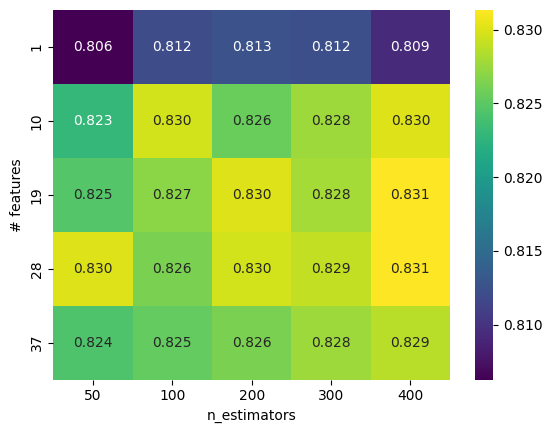

In [36]:
p = sns.heatmap(df, annot=True, fmt='.3f', cmap='viridis')
p.set_xlabel("n_estimators")
p.set_ylabel("# features")

In [37]:
print(tuning_res_rf.best_params_)
Best_RF = tuning_res_rf.best_estimator_

{'max_features': 19, 'n_estimators': 400}


Text(0, 0.5, 'Impurity reduction')

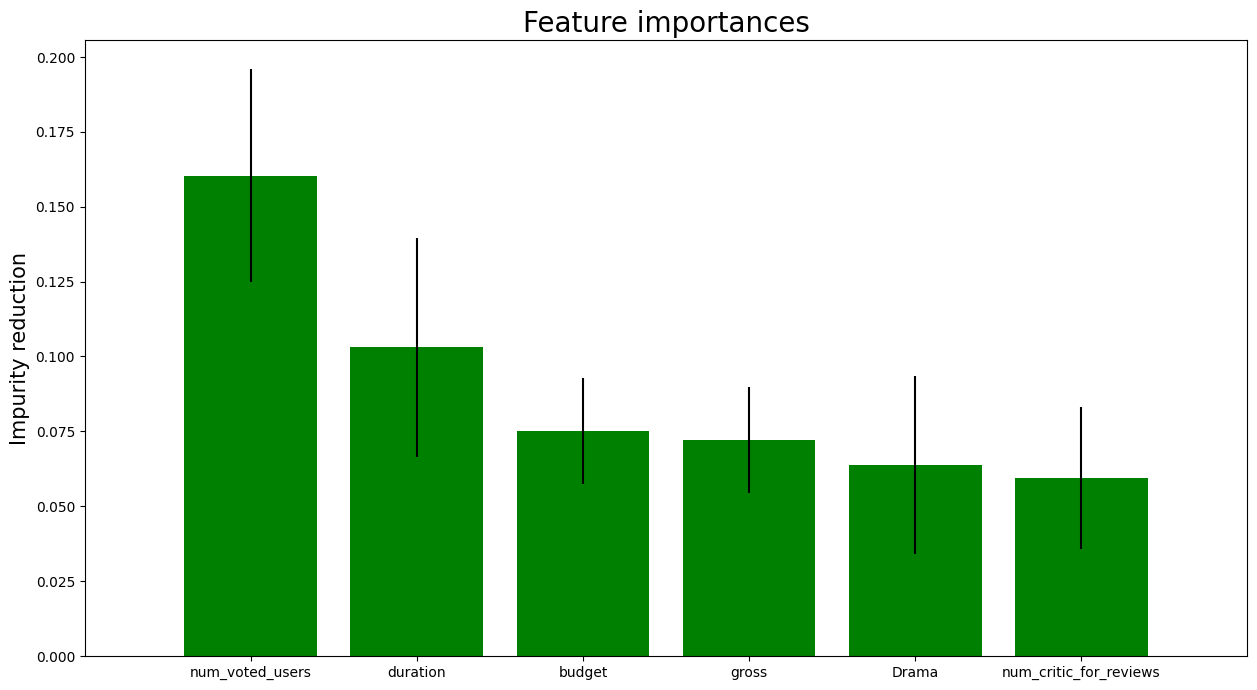

In [38]:
# Plot the feature importances of the forest
importances = Best_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in Best_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

num_feat = 6
plt.figure(figsize=[15, 8])
plt.title("Feature importances", fontsize=20)
plt.bar(range(num_feat)[:num_feat],
        importances[indices][:num_feat],
        color="g",
        yerr=std[indices][:num_feat],
        align="center")
plt.xticks(range(num_feat)[:num_feat], X_train.columns[indices[:num_feat]])
plt.xlim([-1, num_feat])
plt.ylabel("Impurity reduction", fontsize=15)

[**Gradient Boosted Trees**](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)

In [39]:
#Tuning number of iterations and percentage of bootstrap sample
dist = {'n_estimators': stats.randint(100, 400), 'subsample': stats.uniform()}
tuning_res_gbc = RandomizedSearchCV(GBC(random_state=42),
                                    param_distributions=dist,
                                    scoring='accuracy',
                                    n_iter=25,
                                    n_jobs=1,
                                    cv=3,
                                    verbose=2)
tuning_res_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END ...n_estimators=206, subsample=0.014806583407539708; total time=   0.3s
[CV] END ...n_estimators=206, subsample=0.014806583407539708; total time=   0.2s
[CV] END ...n_estimators=206, subsample=0.014806583407539708; total time=   0.3s
[CV] END ....n_estimators=151, subsample=0.47548324535380193; total time=   1.1s
[CV] END ....n_estimators=151, subsample=0.47548324535380193; total time=   1.1s
[CV] END ....n_estimators=151, subsample=0.47548324535380193; total time=   1.0s
[CV] END .....n_estimators=366, subsample=0.8777863566969863; total time=   3.9s
[CV] END .....n_estimators=366, subsample=0.8777863566969863; total time=   3.8s
[CV] END .....n_estimators=366, subsample=0.8777863566969863; total time=   3.9s
[CV] END ....n_estimators=367, subsample=0.19846243962153787; total time=   1.3s
[CV] END ....n_estimators=367, subsample=0.19846243962153787; total time=   1.4s
[CV] END ....n_estimators=367, subsample=0.19846

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=25, n_jobs=1,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f09709de0b0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f097085cd30>},
                   scoring='accuracy', verbose=2)

In [40]:
print(tuning_res_gbc.best_params_)
Best_GBT = tuning_res_gbc.best_estimator_

{'n_estimators': 322, 'subsample': 0.689335110195217}


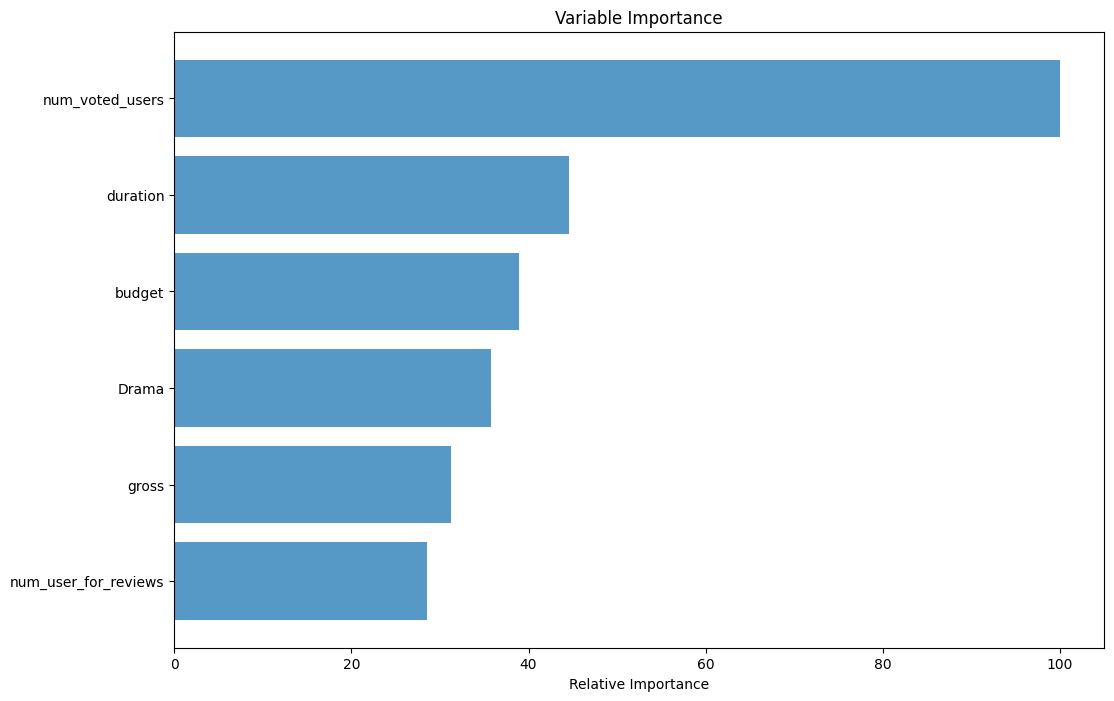

In [41]:
# Plot feature importance
feature_importance = Best_GBT.feature_importances_
# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
num_feat = 6

plt.figure(figsize=[12, 8])
plt.barh(pos[-num_feat:],
         feature_importance[sorted_idx][-num_feat:],
         align='center',
         alpha=0.75)
plt.yticks(pos[-num_feat:], X_train.columns[sorted_idx][-num_feat:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

**Comparing results of Decision Tree, Random Forest and Gradient Boosted Trees**

In [44]:
models = [Best_CART, Best_RF, Best_GBT]
accuracies_test = [accuracy_score(m.predict(X_test), y_test) for m in models]

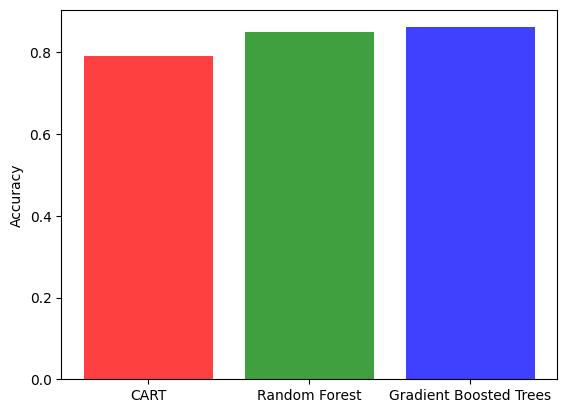

In [45]:
plt.bar(['CART', 'Random Forest', 'Gradient Boosted Trees'],
        accuracies_test,
        color=['red', 'green', 'blue'],
        alpha=0.75)
plt.ylabel('Accuracy');

### Exercises

Tune Gradient Boosted Trees using `GridSearchCV` setup as for Random Forest (with tuning `n_estimators` and `max_features`). Extract best estimator form the results of grid search.

In [ ]:
grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': np.linspace(1, X_train.shape[1], 5).astype(int)
}
tuning_res_grid_gbt = GridSearchCV(GBC(random_state=42),
                                   param_grid=grid,
                                   scoring='accuracy',
                                   n_jobs=1,
                                   cv=3,
                                   verbose=2)
tuning_res_grid_gbt.fit(X_train, y_train)

Calculate accuracy for produced Boosted Trees on test data. Add the result as 4th bar on the previously produced barplot.

In [ ]:
Best_GBT_Grid = tuning_res_grid_gbt.best_estimator_

In [ ]:
accuracies_test.append(accuracy_score(Best_GBT_Grid.predict(X_test), y_test))
plt.bar(['CART', 'Random Forest', 'GBT Random', 'GBT Grid'],
        accuracies_test,
        color=['red', 'green', 'blue', 'gray'],
        alpha=0.75)
plt.ylabel('Accuracy')